# Housing PRICE Prediction Analysis

In [132]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

## Data Loading

In [133]:
dataset1 = pd.read_csv("./NY-House-Dataset.csv")
dataset1.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [134]:
dataset1.shape

(4801, 17)

In [135]:
dataset1.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [136]:
dataset1['TYPE'].unique()

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Land for sale', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house for sale', 'Condop for sale'],
      dtype=object)

In [137]:
dataset1['TYPE'].value_counts()

TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

**Drop features that are not required to build our model. These are either irrelevant or dependant**

In [138]:
dataset2 = dataset1.drop(['BROKERTITLE','ADDRESS','STATE','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','STREET_NAME','LONG_NAME','FORMATTED_ADDRESS','LATITUDE','LONGITUDE','LOCALITY'],axis='columns')
dataset2.shape

(4801, 6)

## Data Cleaning

In [139]:
dataset2.isnull().sum()

TYPE            0
PRICE           0
BEDS            0
BATH            0
PROPERTYSQFT    0
SUBLOCALITY     0
dtype: int64

In [140]:
dataset2.shape

(4801, 6)

In [141]:
dataset2.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
0,Condo for sale,315000,2,2.000000,1400.0,Manhattan
1,Condo for sale,195000000,7,10.000000,17545.0,New York County
2,House for sale,260000,4,2.000000,2015.0,Richmond County
3,Condo for sale,69000,3,1.000000,445.0,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York County


## Feature Engineering

**Explore PROPERTYSQFT feature**

**For below row, it shows PROPERTYSQFT as 2184.207862 which is not an integer. so we remove all such values**

In [201]:
dataset2.loc[6]

TYPE            Condo for sale
PRICE                   899500
BEDS                         2
BATH                       2.0
PROPERTYSQFT       2184.207862
SUBLOCALITY           New York
Name: 6, dtype: object

**Add new feature called PRICE per square feet**

In [143]:
dataset3 = dataset2[~(dataset2.PROPERTYSQFT==2184.207862)]
dataset4 = dataset3.copy()
dataset4['PRICE_PER_SQFT'] = dataset4['PRICE']/dataset4['PROPERTYSQFT']
dataset4.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
0,Condo for sale,315000,2,2.000000,1400.0,Manhattan,225.000000
1,Condo for sale,195000000,7,10.000000,17545.0,New York County,11114.277572
2,House for sale,260000,4,2.000000,2015.0,Richmond County,129.032258
3,Condo for sale,69000,3,1.000000,445.0,New York County,155.056180
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York County,3880.070547


In [144]:
dataset5_stats = dataset4['PRICE_PER_SQFT'].describe()
dataset5_stats

count      3180.000000
mean        872.625829
std        3865.415706
min          61.875000
25%         391.719363
50%         555.444444
75%         932.691161
max      214748.364700
Name: PRICE_PER_SQFT, dtype: float64

In [145]:
dataset4.to_csv("bhp.csv",index=False)

**Examine SUBLOCALITYs which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of SUBLOCALITYs**

In [146]:
dataset4.SUBLOCALITY = dataset4.SUBLOCALITY.apply(lambda x: x.strip())
LOCALITY_stats = dataset4['SUBLOCALITY'].value_counts(ascending=False)
LOCALITY_stats

SUBLOCALITY
New York            567
Kings County        514
Richmond County     456
Brooklyn            382
Queens County       288
Queens              278
Bronx County        249
New York County     215
The Bronx           148
Staten Island        56
Manhattan            13
Coney Island          3
Riverdale             3
Flushing              2
East Bronx            1
Brooklyn Heights      1
Rego Park             1
Fort Hamilton         1
Dumbo                 1
Snyder Avenue         1
Name: count, dtype: int64

In [147]:
LOCALITY_stats.values.sum()

3180

In [148]:
len(LOCALITY_stats[LOCALITY_stats>10])

11

In [149]:
len(LOCALITY_stats)

20

In [150]:
len(LOCALITY_stats[LOCALITY_stats<=10])

9

## Dimensionality Reduction

**Any SUBLOCALITY having less than 10 data points should be tagged as "other" SUBLOCALITY. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [151]:
LOCALITY_stats_less_than_10 = LOCALITY_stats[LOCALITY_stats<=10]
LOCALITY_stats_less_than_10

SUBLOCALITY
Coney Island        3
Riverdale           3
Flushing            2
East Bronx          1
Brooklyn Heights    1
Rego Park           1
Fort Hamilton       1
Dumbo               1
Snyder Avenue       1
Name: count, dtype: int64

In [152]:
len(dataset4.SUBLOCALITY.unique())

20

In [153]:
dataset4.SUBLOCALITY = dataset4.SUBLOCALITY.apply(lambda x: 'other' if x in LOCALITY_stats_less_than_10 else x)
len(dataset4.SUBLOCALITY.unique())

12

In [154]:
dataset4.head(10)

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
0,Condo for sale,315000,2,2.000000,1400.0,Manhattan,225.000000
1,Condo for sale,195000000,7,10.000000,17545.0,New York County,11114.277572
2,House for sale,260000,4,2.000000,2015.0,Richmond County,129.032258
3,Condo for sale,69000,3,1.000000,445.0,New York County,155.056180
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York County,3880.070547
5,House for sale,690000,5,2.000000,4004.0,Kings County,172.327672
7,House for sale,16800000,8,16.000000,33000.0,Richmond County,509.090909
8,Co-op for sale,265000,1,1.000000,750.0,other,353.333333
9,Co-op for sale,440000,2,1.000000,978.0,Brooklyn,449.897751
10,Co-op for sale,375000,2,1.000000,850.0,The Bronx,441.176471


## Outlier Removal

let us assume the threshold to be 300 PROPERTYSQFT per BEDS

In [155]:
dataset4[dataset4.PROPERTYSQFT/dataset4.BEDS<200].head(1000)

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
3,Condo for sale,69000,3,1.0,445.0,New York County,155.056180
17,Co-op for sale,199000,3,1.0,325.0,Brooklyn,612.307692
185,House for sale,549000,5,3.0,496.0,Bronx County,1106.854839
188,For sale,65000,3,1.0,230.0,New York,282.608696
277,Co-op for sale,560000,3,1.0,550.0,New York,1018.181818
...,...,...,...,...,...,...,...
4680,Condo for sale,375000,3,1.0,500.0,Queens,750.000000
4693,Pending,250000,3,1.0,246.0,New York,1016.260163
4729,Condo for sale,529000,3,1.0,367.0,New York,1441.416894
4764,Co-op for sale,189000,3,1.0,300.0,Brooklyn,630.000000


**Check above data points. We have 6 BEDS apartment with 1020 PROPERTYSQFT. Another one is 8 BEDS and total PROPERTYSQFT is 600. These are clear data errors that can be removed safely**

In [156]:
dataset4.shape

(3180, 7)

In [157]:
dataset5 = dataset4[~(dataset4.PROPERTYSQFT/dataset4.BEDS<200)]
dataset5.shape

(3083, 7)

In [158]:


dataset5.shape

(3083, 7)

In [159]:
def remove_pps_outliers(dataset):
    dataset_out = pd.DataFrame()
    for key, subdataset in dataset.groupby('SUBLOCALITY'):
        m = np.mean(subdataset.PRICE_PER_SQFT)
        st = np.std(subdataset.PRICE_PER_SQFT)
        reduced_dataset = subdataset[(subdataset.PRICE_PER_SQFT>(m-st)) & (subdataset.PRICE_PER_SQFT<=(m+st))]
        dataset_out = pd.concat([dataset_out,reduced_dataset],ignore_index=True)
    return dataset_out
dataset6 = remove_pps_outliers(dataset5)
dataset6.shape

(2489, 7)

In [160]:
dataset6 = dataset6[~(dataset6.BEDS>14)]
LOCALITY_stats = dataset6['BEDS'].value_counts(ascending=False)
LOCALITY_stats

BEDS
3     729
2     530
1     387
4     327
5     194
6     142
7      61
8      50
9      24
10     13
11     10
12      9
14      1
Name: count, dtype: int64

In [161]:
LOCALITY_stats = dataset6['SUBLOCALITY'].value_counts(ascending=False)
LOCALITY_stats

SUBLOCALITY
Richmond County    453
New York           431
Kings County       392
Brooklyn           284
Queens County      218
Queens             183
Bronx County       180
New York County    167
The Bronx          113
Staten Island       35
other               13
Manhattan            8
Name: count, dtype: int64

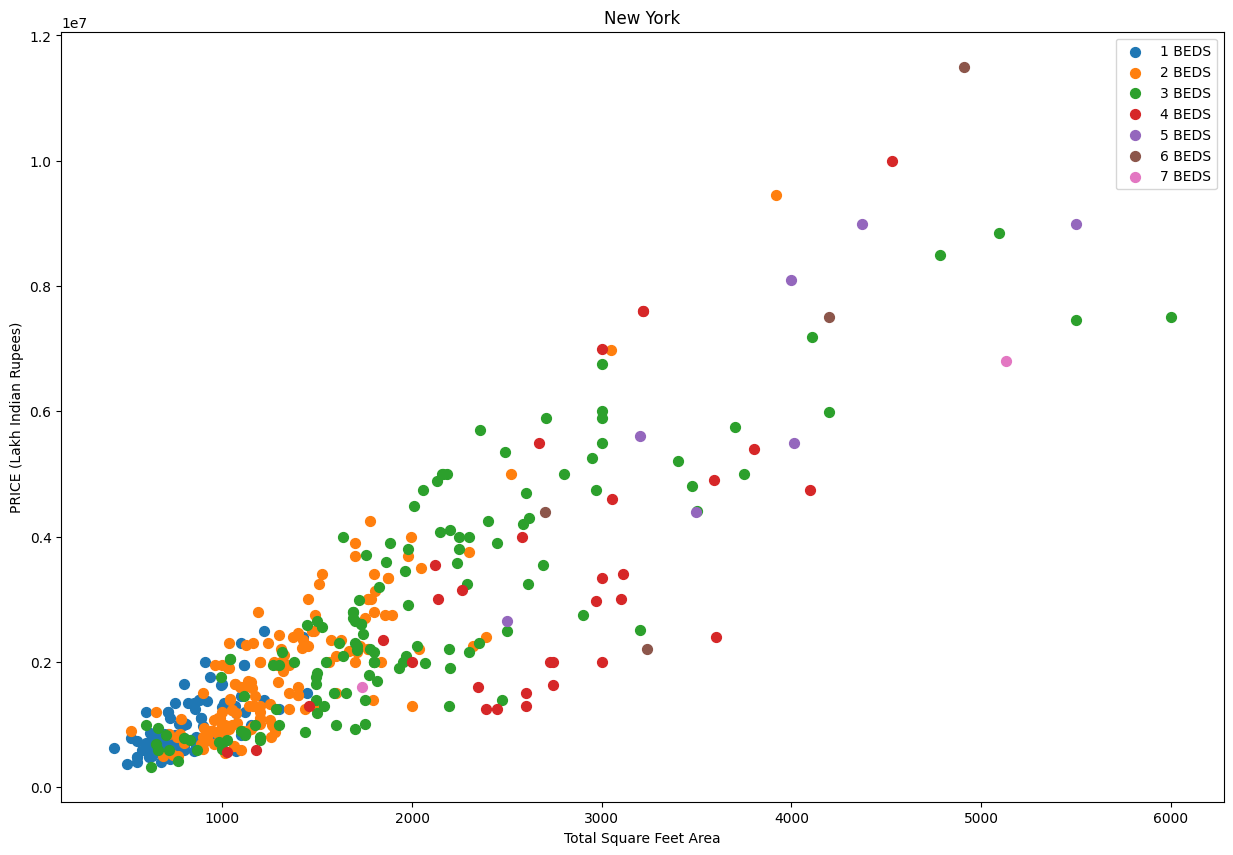

In [162]:
def plot_scatter_chart(dataset,SUBLOCALITY):
    import matplotlib.pyplot as plt

def plot_scatter_chart(dataset, SUBLOCALITY):
    # Filter data for the specified SUBLOCALITY
    data = dataset[dataset['SUBLOCALITY'] == SUBLOCALITY]

    # Set figure size
    plt.figure(figsize=(15, 10))

    # Iterate over unique values of BEDS
    for beds in sorted(data['BEDS'].unique()):
        # Filter data for the current value of BEDS
        subset = data[data['BEDS'] == beds]
        # Scatter plot for current value of BEDS
        plt.scatter(subset['PROPERTYSQFT'], subset['PRICE'], label=f'{beds} BEDS', s=50)

    # Axes labels and title
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("PRICE (Lakh Indian Rupees)")
    plt.title(SUBLOCALITY)

    # Legend
    plt.legend()

    # Show plot
    plt.show()

    
plot_scatter_chart(dataset6,"New York")


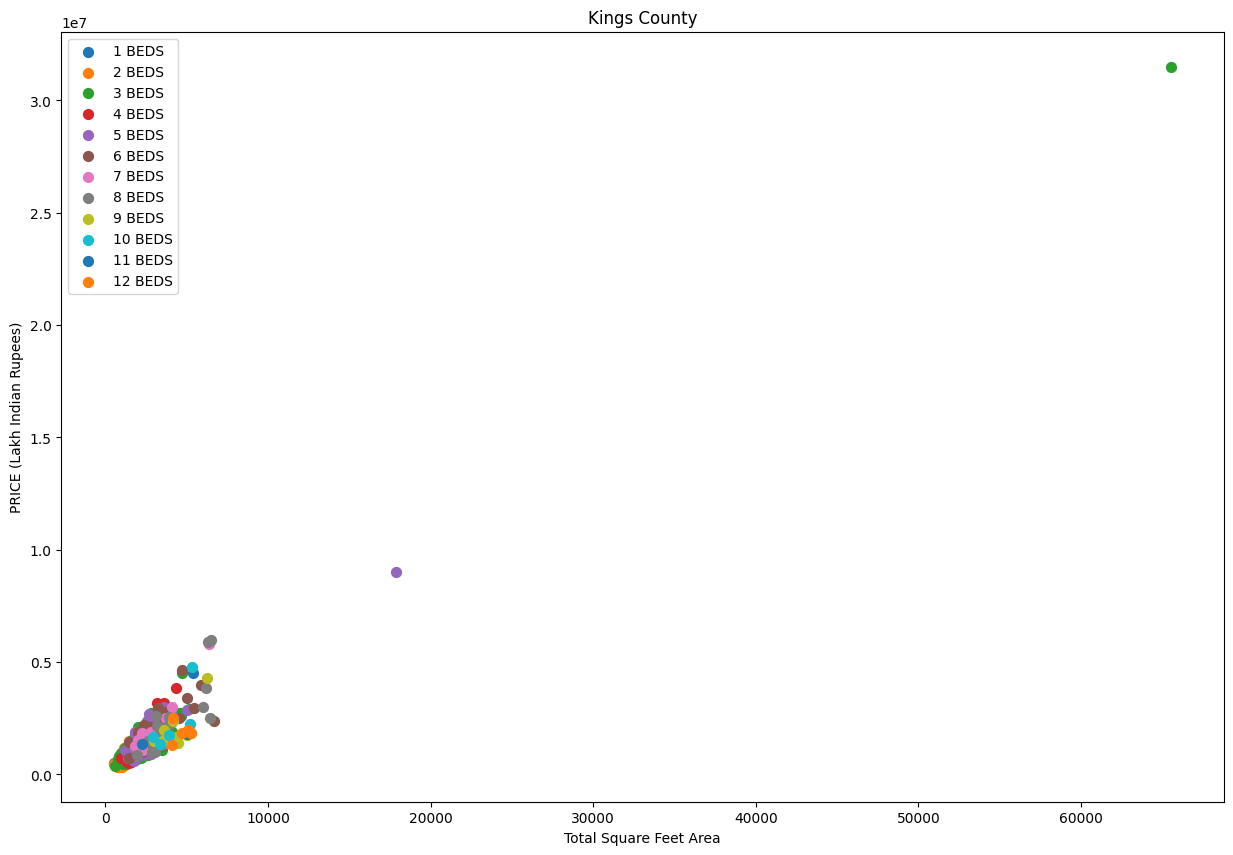

In [163]:
plot_scatter_chart(dataset6,"Kings County")

In [165]:

dataset7 = dataset7[~(dataset7.PROPERTYSQFT>40000)]
dataset7 = dataset7[~((dataset7['BATH'] > 2) & (dataset7['BATH'] < 3))]

**Plot same scatter chart again to visualize PRICE_PER_SQFT for 2 BEDS and 3 BEDS properties**

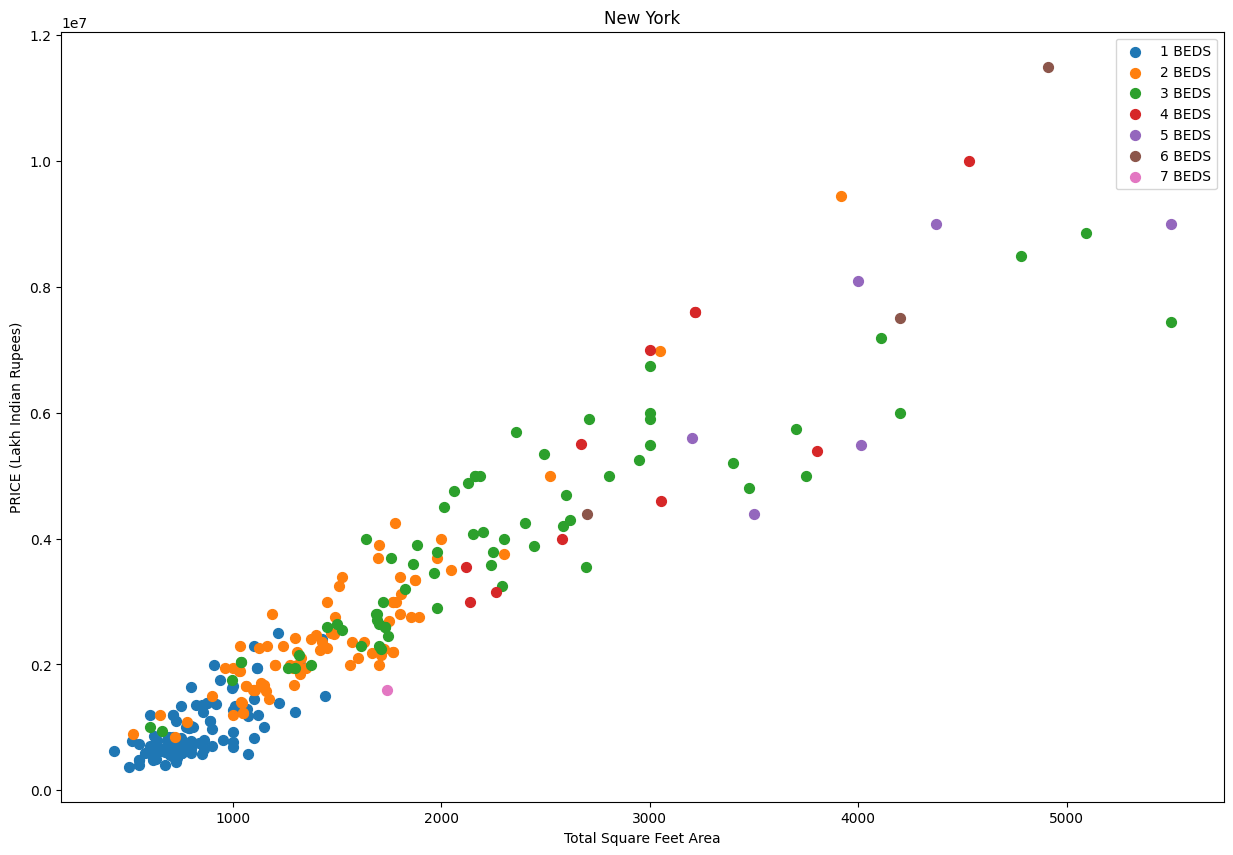

In [166]:
plot_scatter_chart(dataset7,"New York")

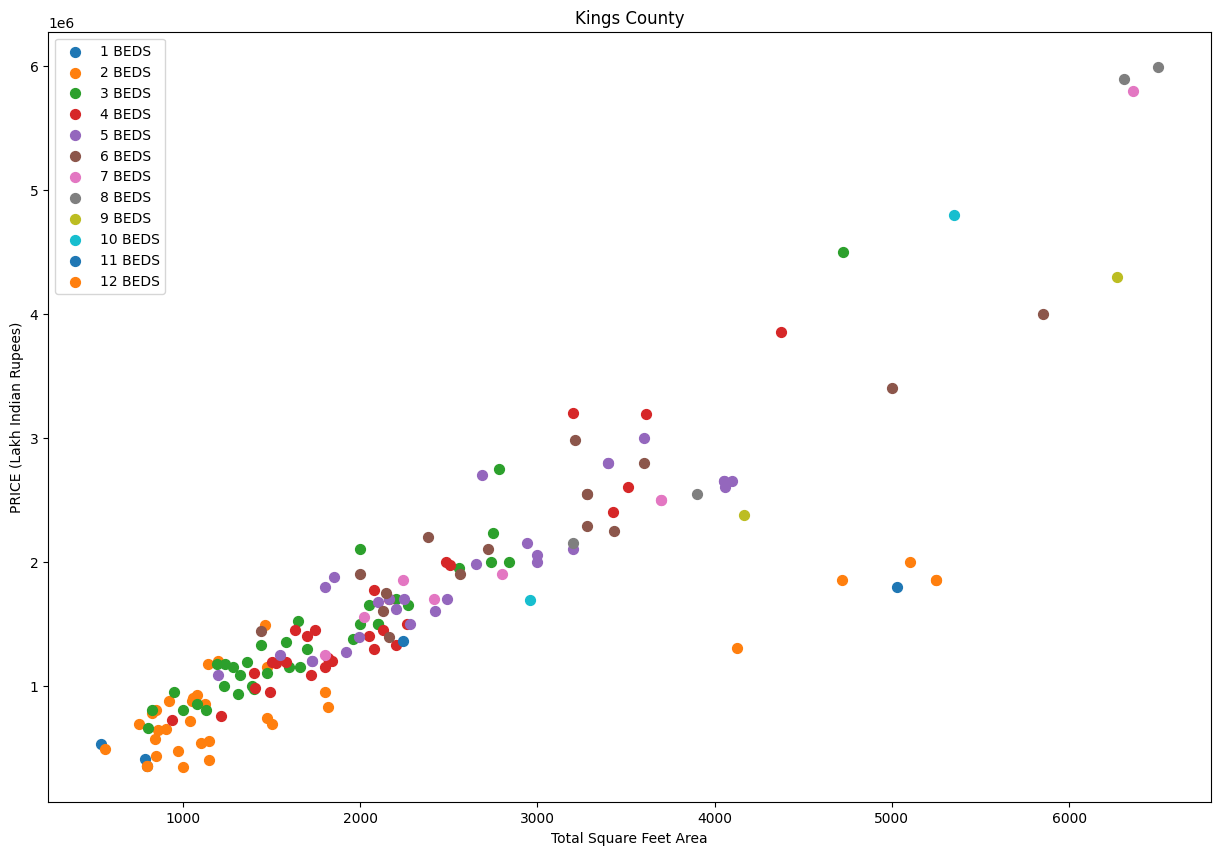

In [167]:
plot_scatter_chart(dataset7,"Kings County")

**Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function**

Text(0, 0.5, 'Count')

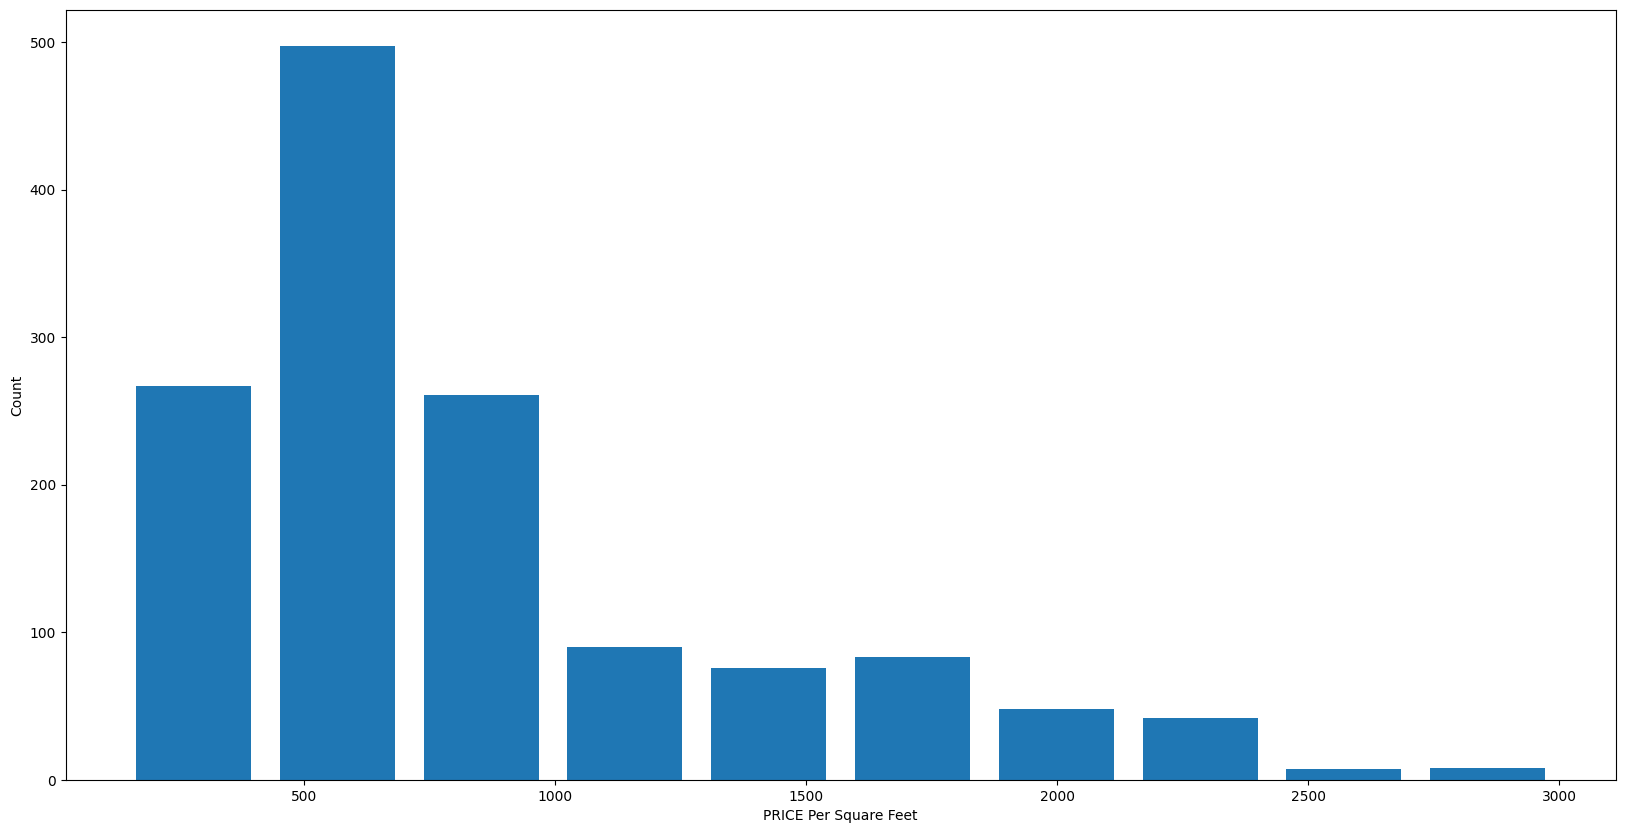

In [168]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(dataset7.PRICE_PER_SQFT,rwidth=0.8)
plt.xlabel("PRICE Per Square Feet")
plt.ylabel("Count")

In [169]:
dataset7.BATH.unique()

array([ 3.,  1.,  2.,  4.,  8.,  6.,  5., 11.,  7.,  9., 10., 16.])

Text(0, 0.5, 'Count')

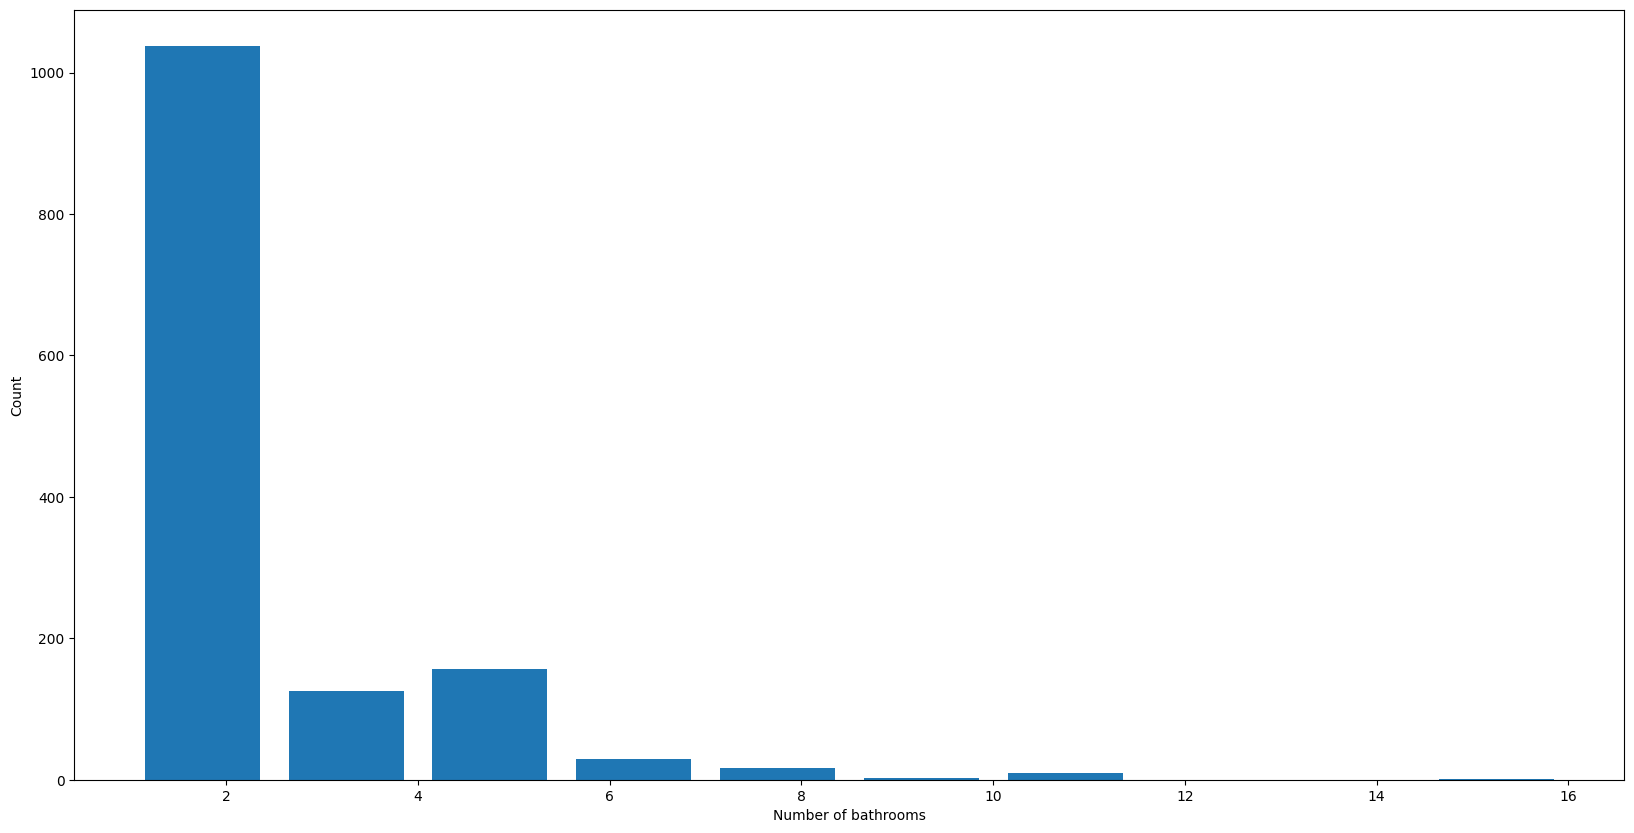

In [170]:
plt.hist(dataset7.BATH,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [171]:
dataset7[dataset7.BATH>10]

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
637,Multi-family home for sale,4295000,9,11.0,6270.0,Kings County,685.007974
1359,Townhouse for sale,19995000,11,11.0,11110.0,New York County,1799.729973
1875,House for sale,16800000,8,16.0,33000.0,Richmond County,509.090909


**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [172]:
dataset7[dataset7.BATH>dataset7.BEDS+2]

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
1470,Townhouse for sale,10500000,7,10.0,7040.0,New York County,1491.477273
1875,House for sale,16800000,8,16.0,33000.0,Richmond County,509.090909


In [173]:
dataset8 = dataset7[dataset7.BATH<dataset7.BEDS+2]
dataset8.shape

(1367, 7)

In [174]:
dataset8.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
0,Multi-family home for sale,1100000,6,3.0,2837.0,Bronx County,387.733521
7,Condo for sale,200000,1,1.0,613.0,Bronx County,326.264274
9,Multi-family home for sale,899000,8,2.0,2160.0,Bronx County,416.203704
11,Multi-family home for sale,850000,5,2.0,1908.0,Bronx County,445.492662
15,Co-op for sale,400000,2,2.0,1150.0,Bronx County,347.826087


In [175]:
dataset9 = dataset8.drop(['PRICE_PER_SQFT'],axis='columns')
dataset9.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
0,Multi-family home for sale,1100000,6,3.0,2837.0,Bronx County
7,Condo for sale,200000,1,1.0,613.0,Bronx County
9,Multi-family home for sale,899000,8,2.0,2160.0,Bronx County
11,Multi-family home for sale,850000,5,2.0,1908.0,Bronx County
15,Co-op for sale,400000,2,2.0,1150.0,Bronx County


## One hot Encoder for SUBLOCALITY

In [176]:
dummies = pd.get_dummies(dataset9.SUBLOCALITY).astype(int)
dummies.head(3)

,Bronx County,Brooklyn,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Staten Island,The Bronx,other
0,1,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0


In [177]:
dataset10 = pd.concat([dataset9,dummies.drop('other',axis='columns')],axis='columns')
dataset10.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,Bronx County,Brooklyn,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Staten Island,The Bronx
0,Multi-family home for sale,1100000,6,3.0,2837.0,Bronx County,1,0,0,0,0,0,0,0,0,0,0
7,Condo for sale,200000,1,1.0,613.0,Bronx County,1,0,0,0,0,0,0,0,0,0,0
9,Multi-family home for sale,899000,8,2.0,2160.0,Bronx County,1,0,0,0,0,0,0,0,0,0,0
11,Multi-family home for sale,850000,5,2.0,1908.0,Bronx County,1,0,0,0,0,0,0,0,0,0,0
15,Co-op for sale,400000,2,2.0,1150.0,Bronx County,1,0,0,0,0,0,0,0,0,0,0


In [178]:
dummies = pd.get_dummies(dataset10.TYPE).astype(int)
dummies.head(3)

,Co-op for sale,Coming Soon,Condo for sale,Contingent,For sale,House for sale,Multi-family home for sale,Pending,Townhouse for sale
0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0


In [179]:
dataset10 = pd.concat([dataset10,dummies],axis='columns')
dataset10.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,Bronx County,Brooklyn,Kings County,Manhattan,...,The Bronx,Co-op for sale,Coming Soon,Condo for sale,Contingent,For sale,House for sale,Multi-family home for sale,Pending,Townhouse for sale
0,Multi-family home for sale,1100000,6,3.0,2837.0,Bronx County,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,Condo for sale,200000,1,1.0,613.0,Bronx County,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,Multi-family home for sale,899000,8,2.0,2160.0,Bronx County,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,Multi-family home for sale,850000,5,2.0,1908.0,Bronx County,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15,Co-op for sale,400000,2,2.0,1150.0,Bronx County,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [180]:
dataset11 = dataset10.drop(['SUBLOCALITY','TYPE'],axis='columns')
dataset11.head(2)

,PRICE,BEDS,BATH,PROPERTYSQFT,Bronx County,Brooklyn,Kings County,Manhattan,New York,New York County,...,The Bronx,Co-op for sale,Coming Soon,Condo for sale,Contingent,For sale,House for sale,Multi-family home for sale,Pending,Townhouse for sale
0,1100000,6,3.0,2837.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,200000,1,1.0,613.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Model Building

In [181]:
dataset11.shape

(1367, 24)

In [182]:
X = dataset11.drop(['PRICE'],axis='columns')
X.head(3)

,BEDS,BATH,PROPERTYSQFT,Bronx County,Brooklyn,Kings County,Manhattan,New York,New York County,Queens,...,The Bronx,Co-op for sale,Coming Soon,Condo for sale,Contingent,For sale,House for sale,Multi-family home for sale,Pending,Townhouse for sale
0,6,3.0,2837.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1,1.0,613.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,8,2.0,2160.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [183]:
X.shape

(1367, 23)

In [184]:
y = dataset11.PRICE
y.head(3)

0    1100000
7     200000
9     899000
Name: PRICE, dtype: int64

In [185]:
len(y)

1367

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [187]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8911459907451028

## K Fold CV

In [188]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.91575789, 0.83000148, 0.90903037, 0.91264092, 0.7844581 ,
       0.8369497 , 0.90512247, 0.89629719, 0.79632605, 0.82657029])

## Testing Data

In [190]:
def predict_PRICE(SUBLOCALITY, TYPE, PROPERTYSQFT, BEDS, BATH):
    loc_index = np.where(X.columns == SUBLOCALITY)[0][0]
    type_index = np.where(X.columns == TYPE)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = BEDS
    x[1] = BATH
    x[2] = PROPERTYSQFT
    if loc_index >= 0 and type_index >= 0:
        x[loc_index] = 1
        x[type_index] = 1

    return lr_clf.predict([x])[0]


In [191]:
predict_PRICE('Manhattan','Condo for sale',1000, 2, 2)

C:\Users\55443\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1957322.1875082648

In [192]:
predict_PRICE('Kings County','House for sale',4004, 5, 2)

C:\Users\55443\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


5369924.728501161

In [193]:
predict_PRICE('Queens','Co-op for sale',750, 1, 1)

C:\Users\55443\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184807.02445554058

## Export the Pickle file

In [194]:
import pickle
with open('NYHousemodel.pickle','wb') as f:
    pickle.dump(lr_clf,f)

## Create JSON File

In [195]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))